# Resolução do Case: Parte 2

Nesta segunda parte da resolução do case vamos focar na resolução do restante das perguntas.

## Pacotes

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carrega base

* Vamos carregar as bases que serão utilizadas na análise

In [16]:
df_super_bowls = pd.read_csv("../data/super_bowls.csv", sep=";")
print(df_super_bowls.shape)
df_super_bowls.head()

(52, 18)


,data,edicao_super_bowl,estadio,cidade,estado,numero_torcedores,time_vencedor,pontos_vencedor,quarterback_vencedor_1,quarterback_vencedor_2,tecnico_vencedor,time_perdedor,pontos_perdedor,quarterback_perdedor_1,quarterback_perdedor_2,tecnico_perdedor,pontos_total,pontos_diferenca
0,04/02/2018,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,05/02/2017,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,07/02/2016,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,01/02/2015,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,02/02/2014,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


In [17]:
df_super_bowls.columns

Index(['data', 'edicao_super_bowl', 'estadio', 'cidade', 'estado',
       'numero_torcedores', 'time_vencedor', 'pontos_vencedor',
       'quarterback_vencedor_1', 'quarterback_vencedor_2', 'tecnico_vencedor',
       'time_perdedor', 'pontos_perdedor', 'quarterback_perdedor_1',
       'quarterback_perdedor_2', 'tecnico_perdedor', 'pontos_total',
       'pontos_diferenca'],
      dtype='object')

In [18]:
df_tv = pd.read_csv("../data/tv.csv", sep=";")
print(df_tv.shape)
df_tv.head()

(53, 6)


,edicao_super_bowl,canal,media_us_telespectadores,total_us_telespectadores,nota_telespectadores,custos_anuncio
0,52,NBC,"103,390,000.00",NaN,43.1,"5,000,000.00"
1,51,Fox,"111,319,000.00","172,000,000.00",45.3,"5,000,000.00"
2,50,CBS,"111,864,000.00","167,000,000.00",46.6,"5,000,000.00"
3,49,NBC,"114,442,000.00","168,000,000.00",47.5,"4,500,000.00"
4,48,Fox,"112,191,000.00","167,000,000.00",46.7,"4,000,000.00"


In [19]:
df_show = pd.read_csv("../data/musicos_show_intervalo.csv", sep=";")
print(df_show.shape)
df_show.head()

(134, 3)


,edicao_super_bowl,musico,numero_musicas
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


## Tratamento da Base
* Vamos primeiro encontrar o período de tempo que temos na base.
* Vamos avaliar a ocorrência dos missing values  

In [21]:
df_super_bowls['data'] = pd.to_datetime(df_super_bowls['data'])

In [22]:
data_min = df_super_bowls['data'].min()
data_max = df_super_bowls['data'].max()
print("Os registros dos jogos contidos na base estão entre {} e {}".format(data_min, data_max))

Os registros dos jogos contidos na base estão entre 1967-01-15 00:00:00 e 2018-04-02 00:00:00


In [23]:
( df_super_bowls.isnull().sum() / len(df_super_bowls) ) * 100

data                       0.000000
edicao_super_bowl          0.000000
estadio                    0.000000
cidade                     0.000000
estado                     0.000000
numero_torcedores          0.000000
time_vencedor              0.000000
pontos_vencedor            0.000000
quarterback_vencedor_1     0.000000
quarterback_vencedor_2    96.153846
tecnico_vencedor           0.000000
time_perdedor              0.000000
pontos_perdedor            0.000000
quarterback_perdedor_1     0.000000
quarterback_perdedor_2    94.230769
tecnico_perdedor           0.000000
pontos_total               0.000000
pontos_diferenca           0.000000
dtype: float64

In [24]:
(df_tv.isnull().sum() / len(df_tv)) * 100

edicao_super_bowl            0.000000
canal                        0.000000
media_us_telespectadores     0.000000
total_us_telespectadores    71.698113
nota_telespectadores         0.000000
custos_anuncio               0.000000
dtype: float64

In [25]:
(df_show.isnull().sum() / len(df_show)) * 100

edicao_super_bowl     0.000000
musico                0.000000
numero_musicas       34.328358
dtype: float64

Com relação aos missing values:
  * Note que as colunas quarterback_vencedor_2 e quarterback_perdedor_2 tem missing values acima de 94% 
  * A coluna total_us_telespectadores tem 71% de missing values. Enquanto a numero_musicas tem 34%.

## Pergunta 2:

### Analise a diferença de pontuação entre os times em cada jogo. Quais as principais conclusões que podem ser extraídas?

### Tabela Super Bowl 

In [26]:
df_super_bowls.columns

Index(['data', 'edicao_super_bowl', 'estadio', 'cidade', 'estado',
       'numero_torcedores', 'time_vencedor', 'pontos_vencedor',
       'quarterback_vencedor_1', 'quarterback_vencedor_2', 'tecnico_vencedor',
       'time_perdedor', 'pontos_perdedor', 'quarterback_perdedor_1',
       'quarterback_perdedor_2', 'tecnico_perdedor', 'pontos_total',
       'pontos_diferenca'],
      dtype='object')

**Como estão distribuídas diferenças de pontos dos jogos?**

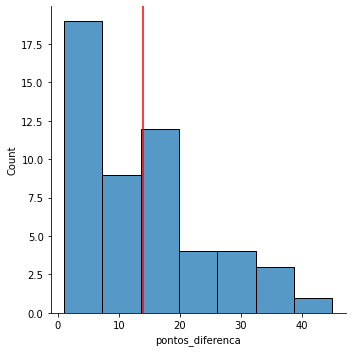

In [27]:
# df_super_bowls['pontos_diferenca']

sns.displot(data=df_super_bowls['pontos_diferenca'])
plt.axvline(x=df_super_bowls['pontos_diferenca'].mean(), color='r', linestyle='-')
plt.show()

**Quais times venceram com uma diferença de pontos acima da média ?**

In [28]:
filtro = df_super_bowls['pontos_diferenca']>= df_super_bowls['pontos_diferenca'].mean()
df_super_bowls['acima_media'] = np.where(filtro, 1, 0)

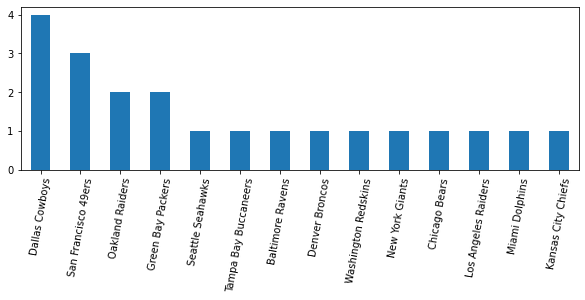

In [29]:
df_super_bowls[df_super_bowls['acima_media']==1]['time_vencedor'].value_counts(
    normalize=False).plot(kind='bar', rot=80, figsize=(10,3))
plt.show()

**Destes times, q venceram com uma diferença de pontos acima da média, quão eficientes foram com relação ao total de vitórias?**

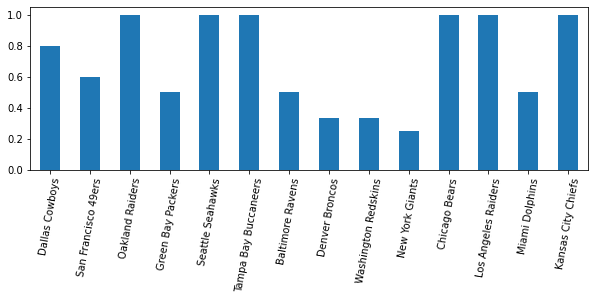

In [30]:
# Vamos inicialmente selecionar todos os times que venceram com uma diferença de pontos acima da média
s = df_super_bowls[df_super_bowls['acima_media']==1]['time_vencedor'].value_counts(normalize=False)

# Vamos calcular a porcentagem de vitórias q ficaram acima da média da diferença de pontos com relação ao total de vitórias
dic = {}
for time in s.index:
    #print(time)
    s[time]
    len_ = len(df_super_bowls[df_super_bowls['time_vencedor']==time])
    dic[time] = s[time] / len_

# Por fim, mostramos num gráfico as porcentagens de vitórias, acima da média da diferença de pontos, para cada time. 
pd.Series(dic).plot(kind='bar', rot=80, figsize=(10,3))
plt.show()

Nota:
  * Já podemos ver que alguns times, quando venceram, o fizeram com uma grande margem de pontos. Mas vale ressaltar que estes tiveram poucas vitórias.
  * Times que tiveram mais vitórias, como é o caso do Dallas Cowboys, venceram 80% delas com uma grande margem de pontos. No caso do San Francisco 49ers, ele venceu 60% dos jogos com uma diferença de pontos acima da média  

## Pergunta 3:

### As diferenças de pontuação ou a soma da pontuação dos dois times afetam o número de telespectadores? Realize uma análise de correlação / regressão para verificar essa hipótese.

In [31]:
df_tv_bowls = df_tv.merge(df_super_bowls, how='left', on='edicao_super_bowl')
df_tv_bowls.head()

,edicao_super_bowl,canal,media_us_telespectadores,total_us_telespectadores,nota_telespectadores,custos_anuncio,data,estadio,cidade,estado,...,quarterback_vencedor_2,tecnico_vencedor,time_perdedor,pontos_perdedor,quarterback_perdedor_1,quarterback_perdedor_2,tecnico_perdedor,pontos_total,pontos_diferenca,acima_media
0,52,NBC,"103,390,000.00",NaN,43.1,"5,000,000.00",2018-04-02,U.S. Bank Stadium,Minneapolis,Minnesota,...,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8,0
1,51,Fox,"111,319,000.00","172,000,000.00",45.3,"5,000,000.00",2017-05-02,NRG Stadium,Houston,Texas,...,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6,0
2,50,CBS,"111,864,000.00","167,000,000.00",46.6,"5,000,000.00",2016-07-02,Levi's Stadium,Santa Clara,California,...,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14,0
3,49,NBC,"114,442,000.00","168,000,000.00",47.5,"4,500,000.00",2015-01-02,University of Phoenix Stadium,Glendale,Arizona,...,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4,0
4,48,Fox,"112,191,000.00","167,000,000.00",46.7,"4,000,000.00",2014-02-02,MetLife Stadium,East Rutherford,New Jersey,...,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35,1


In [32]:
# A coluna que traz o total de telespectadores tem mais de 70% 

df_tv_bowls['total_us_telespectadores'].isnull().sum() / len(df_tv_bowls['total_us_telespectadores']) * 100

71.69811320754717

In [33]:
# Neste caso, vamos usar a media dos telespectadores a fim de analisarmos possíveis correlações com os pontos dos times.

df_tv_bowls['media_us_telespectadores'] = df_tv_bowls['media_us_telespectadores'].apply(lambda x: x.replace(",","") )
df_tv_bowls['media_us_telespectadores'] = df_tv_bowls['media_us_telespectadores'].astype(float, errors = 'raise')

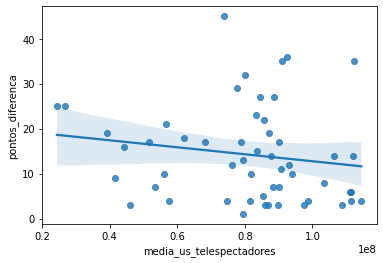

In [34]:
sns.regplot(x="media_us_telespectadores", y="pontos_diferenca", data=df_tv_bowls);

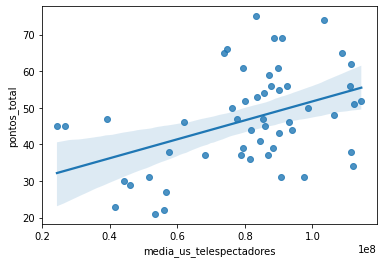

In [35]:
sns.regplot(x="media_us_telespectadores", y="pontos_total", data=df_tv_bowls);

Nota:
  * Podemos notar que há pouca correlação entre a média dos telespectadores e a diferença dos pontos nos jogos. 
  * Por outro lado, vemos que há uma correlação do tipo positiva entre a média dos telespectadores e o total dos pontos nos jogos. Ou seja, Quando há um aumento na média dos telespectadores assistindo os jogos podemos notar um aumento no total de pontos feitos nos jogos.

## Pergunta 4:

### Realize uma análise ao longo do tempo da evolução do número de telespectadores, custos dos anúncios e nota dos telespectadores. Existe alguma relação entre os parâmetros?

In [36]:
df_tv_bowls.head()

,edicao_super_bowl,canal,media_us_telespectadores,total_us_telespectadores,nota_telespectadores,custos_anuncio,data,estadio,cidade,estado,...,quarterback_vencedor_2,tecnico_vencedor,time_perdedor,pontos_perdedor,quarterback_perdedor_1,quarterback_perdedor_2,tecnico_perdedor,pontos_total,pontos_diferenca,acima_media
0,52,NBC,103390000.0,NaN,43.1,"5,000,000.00",2018-04-02,U.S. Bank Stadium,Minneapolis,Minnesota,...,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8,0
1,51,Fox,111319000.0,"172,000,000.00",45.3,"5,000,000.00",2017-05-02,NRG Stadium,Houston,Texas,...,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6,0
2,50,CBS,111864000.0,"167,000,000.00",46.6,"5,000,000.00",2016-07-02,Levi's Stadium,Santa Clara,California,...,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14,0
3,49,NBC,114442000.0,"168,000,000.00",47.5,"4,500,000.00",2015-01-02,University of Phoenix Stadium,Glendale,Arizona,...,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4,0
4,48,Fox,112191000.0,"167,000,000.00",46.7,"4,000,000.00",2014-02-02,MetLife Stadium,East Rutherford,New Jersey,...,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35,1


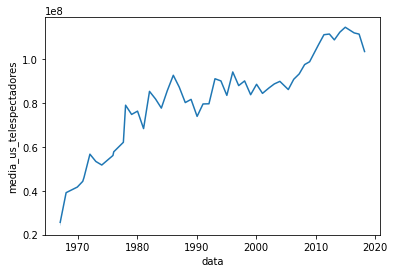

In [37]:
sns.lineplot(data=df_tv_bowls, x="data", y="media_us_telespectadores")
plt.show()

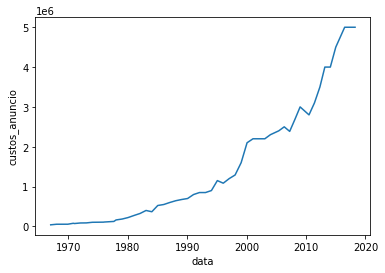

In [38]:
df_tv_bowls['custos_anuncio'] = df_tv_bowls['custos_anuncio'].apply(lambda x: x.replace(",","") )
df_tv_bowls['custos_anuncio'] = df_tv_bowls['custos_anuncio'].astype(float, errors = 'raise')

sns.lineplot(data=df_tv_bowls, x="data", y="custos_anuncio")
plt.show()

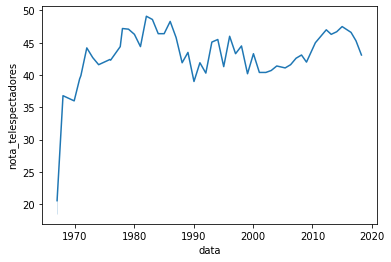

In [39]:
sns.lineplot(data=df_tv_bowls, x="data", y="nota_telespectadores")
plt.show()

Nota:
  * No primeiro plot, vemos que a média dos telespectadores aumentou com o tempo seguindo um crescimento monotônico. 
  * No segundo plot, vemos que houve um acentuado crescimento dos custos dos anúncios durante os anos. O crescimento se assemelha a um do tipo exponencial. 
  * No último plot, vemos que houve um forte crescimento nas notas dos telespectadores entre os anos de 1970 a 1980. Após isso, houve uma leve flutuação e seguiu num comportamento normal.

## Pergunta 5:

### Quais os artistas que mais participaram de shows e quais aqueles que apresentaram mais músicas jogo?

In [40]:
df_show.head()

,edicao_super_bowl,musico,numero_musicas
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


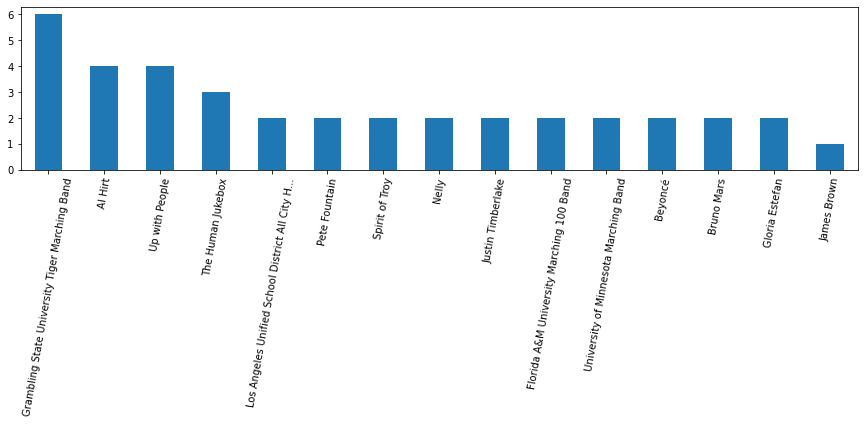

In [41]:
df_show['musico'].value_counts(normalize=False)[0:15].plot(kind='bar', rot=80, figsize=(15,3))
plt.show()

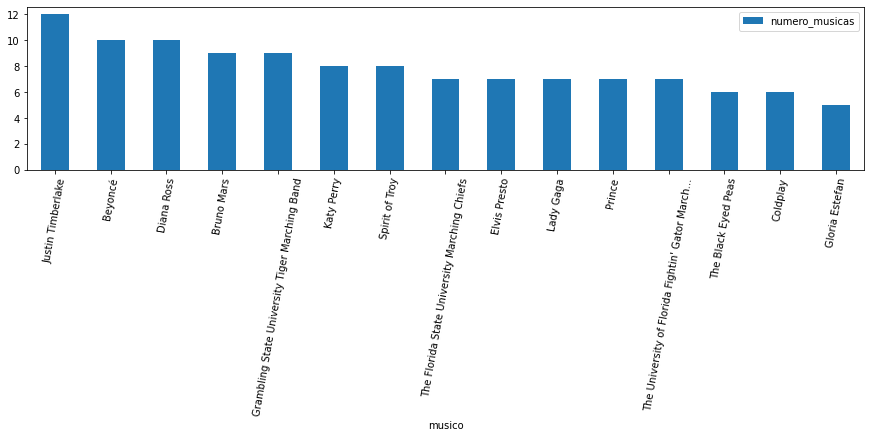

In [42]:
df_show.dropna(subset=['numero_musicas']).groupby('musico').\
agg({'numero_musicas': 'sum'}).\
sort_values(by=['numero_musicas'], ascending=False)[0:15].plot(kind='bar', rot=80, figsize=(15,3))
plt.show()

Nota:
  * No primeiro plot, temos os 15 músicos que mais fizeram apresentações musicais nos jogos.  
  * No segundo plot, temos os 15 artistas que mais quantidade de músicas tocaram nos jogos.

## Pergunta 6:

### Existe alguma relação entre a performance dos times e os shows dos intervalos (ex.: artista, número de músicas)?

* Como primeiro passo vamos definir como perfomance de um time como o percentual de vitórias com relação ao total de jogos que ele jogou. 

In [43]:
# Juntando as informações dos jogos e shows

df_bowls_show = df_super_bowls.merge(df_show , how='left', on='edicao_super_bowl')
df_bowls_show.head()

,data,edicao_super_bowl,estadio,cidade,estado,numero_torcedores,time_vencedor,pontos_vencedor,quarterback_vencedor_1,quarterback_vencedor_2,...,time_perdedor,pontos_perdedor,quarterback_perdedor_1,quarterback_perdedor_2,tecnico_perdedor,pontos_total,pontos_diferenca,acima_media,musico,numero_musicas
0,2018-04-02,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,...,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8,0,Justin Timberlake,11.0
1,2018-04-02,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,...,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8,0,University of Minnesota Marching Band,1.0
2,2017-05-02,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,...,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6,0,Lady Gaga,7.0
3,2016-07-02,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,...,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14,0,Coldplay,6.0
4,2016-07-02,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,...,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14,0,Beyoncé,3.0


In [44]:
# Calculando a quantidade de vitórias para cada time 

df_count_vencedor = df_bowls_show.groupby(['time_vencedor']).agg({'time_vencedor': 'count'}).rename(
    columns={'time_vencedor': 'vitorias'}).reset_index()
df_count_vencedor.columns = ['time', 'vitorias']
df_count_vencedor.head()

,time,vitorias
0,Baltimore Colts,1
1,Baltimore Ravens,9
2,Chicago Bears,1
3,Dallas Cowboys,14
4,Denver Broncos,16


In [45]:
# Calculando a quantidade de derrotas para cada time 

df_count_perdedor = df_bowls_show.groupby(['time_perdedor']).agg({'time_perdedor': 'count'}).rename(
    columns={'time_perdedor': 'derrotas'}).reset_index()
df_count_perdedor.columns = ['time', 'derrotas']
df_count_perdedor.head()

,time,derrotas
0,Arizona Cardinals,1
1,Atlanta Falcons,4
2,Baltimore Colts,1
3,Buffalo Bills,9
4,Carolina Panthers,15


In [46]:
# Juntando as duas informações de quantidades de vitórias e derrotas 

df_count_vencedor_perdedor = df_count_vencedor.merge(df_count_perdedor,
                                                     how='outer', on='time',
                                                     )

# Calcula o percentual de vitórias com relação ao total de jogos

df_count_vencedor_perdedor.columns = ['time', 'vitorias','derrotas']
df_count_vencedor_perdedor= df_count_vencedor_perdedor.fillna(0)
df_count_vencedor_perdedor['percentage_vitoria'] = df_count_vencedor_perdedor['vitorias'] \
/ (df_count_vencedor_perdedor['vitorias']+df_count_vencedor_perdedor['derrotas'])

df_count_vencedor_perdedor.head()

,time,vitorias,derrotas,percentage_vitoria
0,Baltimore Colts,1.0,1.0,0.500000
1,Baltimore Ravens,9.0,0.0,1.000000
2,Chicago Bears,1.0,2.0,0.333333
3,Dallas Cowboys,14.0,4.0,0.777778
4,Denver Broncos,16.0,16.0,0.500000


#### Quais músicos mais tocaram em jogos onde os times tiveram boa performance (percentual de vitória >50%)?

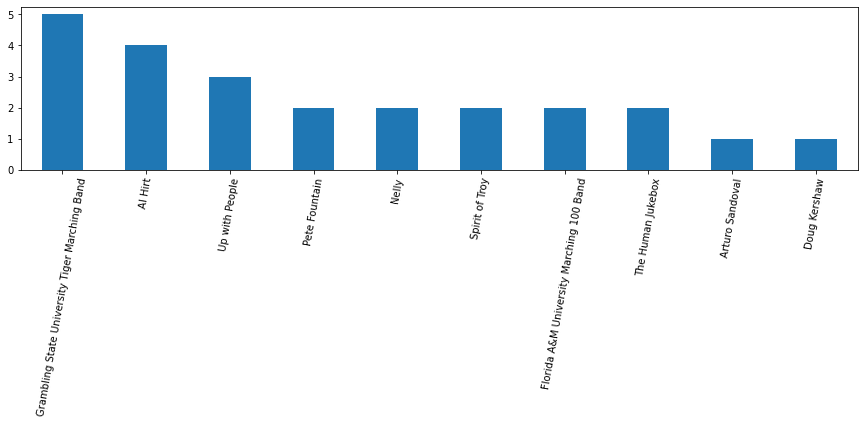

In [47]:
lista_time_vitoriosos = df_count_vencedor_perdedor[df_count_vencedor_perdedor['percentage_vitoria']>0.50]['time'].tolist()

df_bowls_show[df_bowls_show['time_vencedor'].isin(lista_time_vitoriosos)]['musico'].value_counts(
    normalize=False)[0:10].plot(kind='bar', rot=80, figsize=(15,3))
plt.show()

#### Quais músicos mais tocaram em jogos onde os times tiveram má performance (percentual de vitória <50%)?

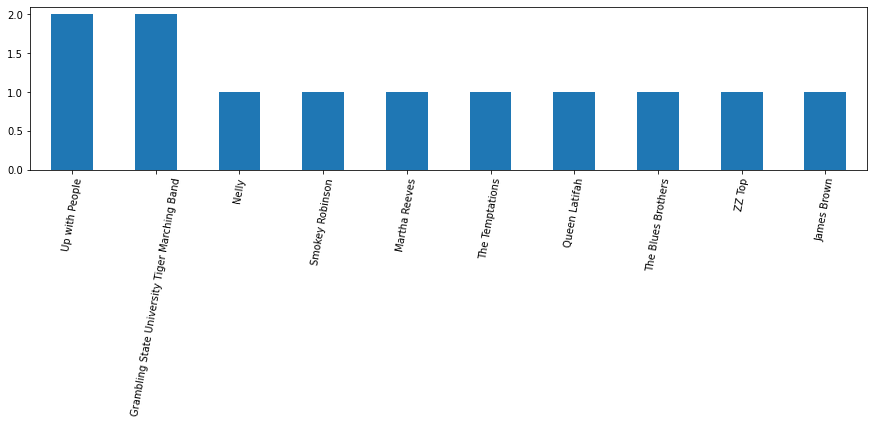

In [48]:
lista_time_derrotados = df_count_vencedor_perdedor[df_count_vencedor_perdedor['percentage_vitoria']<0.50]['time'].tolist()

df_bowls_show[df_bowls_show['time_perdedor'].isin(lista_time_vitoriosos)]['musico'].value_counts(
    normalize=False)[0:10].plot(kind='bar', rot=80, figsize=(15,3))
plt.show()

In [49]:
df_bowls_show[df_bowls_show['time_vencedor'].isin(lista_time_vitoriosos)]['musico'].value_counts(
    normalize=False)[0:10]

Grambling State University Tiger Marching Band    5
Al Hirt                                           4
Up with People                                    3
Pete Fountain                                     2
Nelly                                             2
Spirit of Troy                                    2
Florida A&M University Marching 100 Band          2
The Human Jukebox                                 2
Arturo Sandoval                                   1
Doug Kershaw                                      1
Name: musico, dtype: int64

Nota:
  * Notamos que os músicos Up with People e Grambling State University Tiger Marching Band aparecem com frequencia tanto em shows de times que tiveram boa e má perfomances. 
  * Vale notar que o músico Al Hirt aparece com clareza no shows de times que tiveram boas performances 

## Pergunta 7:

### Existe alguma relação entre a nota dos telespectadores e os shows dos intervalos?


In [50]:
# Juntando as informações das transmissoes e shows

df_tv_show = df_tv.merge(df_show , how='left', on='edicao_super_bowl')
df_tv_show.head()

,edicao_super_bowl,canal,media_us_telespectadores,total_us_telespectadores,nota_telespectadores,custos_anuncio,musico,numero_musicas
0,52,NBC,"103,390,000.00",NaN,43.1,"5,000,000.00",Justin Timberlake,11.0
1,52,NBC,"103,390,000.00",NaN,43.1,"5,000,000.00",University of Minnesota Marching Band,1.0
2,51,Fox,"111,319,000.00","172,000,000.00",45.3,"5,000,000.00",Lady Gaga,7.0
3,50,CBS,"111,864,000.00","167,000,000.00",46.6,"5,000,000.00",Coldplay,6.0
4,50,CBS,"111,864,000.00","167,000,000.00",46.6,"5,000,000.00",Beyoncé,3.0


In [51]:
df_tv_show.isnull().sum()

edicao_super_bowl            0
canal                        0
media_us_telespectadores     0
total_us_telespectadores    89
nota_telespectadores         0
custos_anuncio               0
musico                       0
numero_musicas              49
dtype: int64

In [52]:
# Vamos primeiro encontrar os intervalos interquatils para considerar notas maiores e menores.

quartiles = df_tv_show['nota_telespectadores'].quantile([.25, .5, .75]).values
quartiles

array([41.3, 43.3, 46.3])

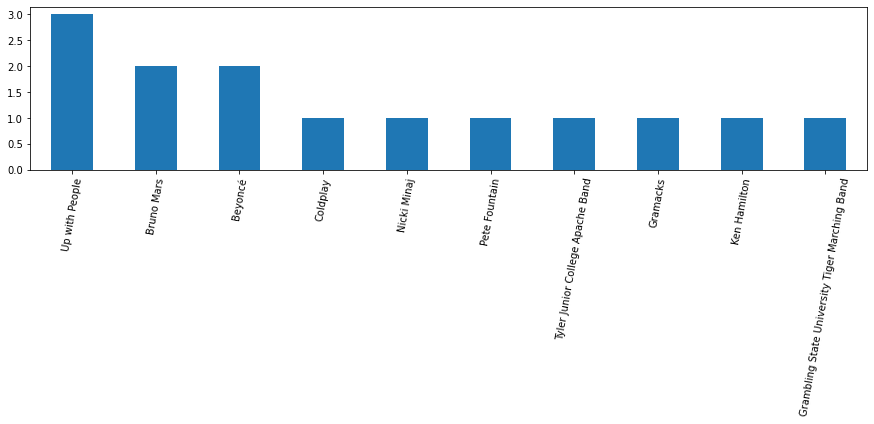

In [53]:
# Quais músicos se apresentaram nos jogos q receberam as maiores notas?

df_tv_show[df_tv_show['nota_telespectadores'] >= quartiles[2]]['musico'].value_counts()[0:10].plot(kind='bar', rot=80, figsize=(15,3))
plt.show()

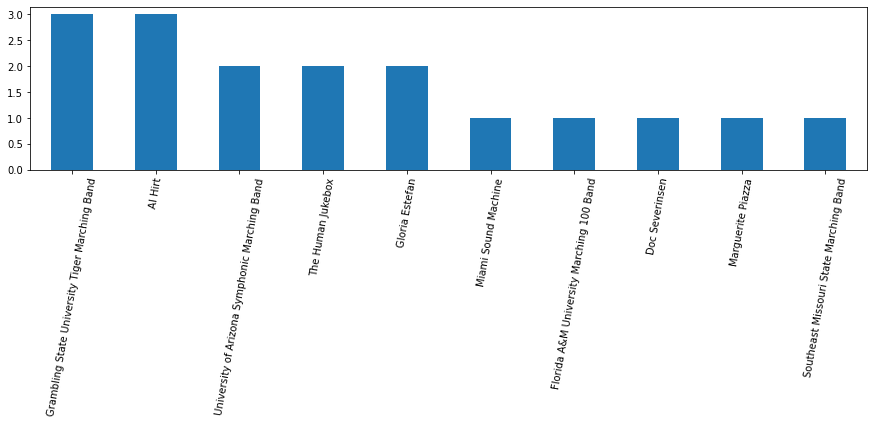

In [54]:
# Quais músicos se apresentaram nos jogos q receberam as menores notas?

df_tv_show[df_tv_show['nota_telespectadores'] <= quartiles[0]]['musico'].value_counts()[0:10].plot(kind='bar', rot=80, figsize=(15,3))
plt.show()

Nota:
  * Notamos que jogos onde tinham apresentações de músicos mais famosos, como Up with People, Bruno Mars, Beyoncé, Coldplay e outros, receberam notas maiores. Enquanto que, jogos com apresentações de bandas e pessoas menos famosas receberam notas menores.

## Pergunta 8:

### Em quantas edições o quarterback do time vencedor tem o segundo nome começando com a letra “b”?

In [55]:
df_super_bowls.head()

,data,edicao_super_bowl,estadio,cidade,estado,numero_torcedores,time_vencedor,pontos_vencedor,quarterback_vencedor_1,quarterback_vencedor_2,tecnico_vencedor,time_perdedor,pontos_perdedor,quarterback_perdedor_1,quarterback_perdedor_2,tecnico_perdedor,pontos_total,pontos_diferenca,acima_media
0,2018-04-02,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8,0
1,2017-05-02,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6,0
2,2016-07-02,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14,0
3,2015-01-02,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4,0
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35,1


In [56]:
COUNT1 = 0
for quarterback in df_super_bowls['quarterback_vencedor_1']:
    split_string = quarterback.split(" ", 10)
    if 'B' in split_string[1][0]:
        COUNT1 = COUNT1 + 1

print(f"Existem {COUNT1} edições onde o quarterback do vencedor tem um segundo nome que começa com a letra 'B' ")

Existem 10 edições onde o quarterback do vencedor tem um segundo nome que começa com a letra 'B' 
